<a href="https://colab.research.google.com/github/BhupathiSampath/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Set all the necessary parameters for data visualization**

In [ ]:
pd.set_option("display.max_columns", 30)
plt.style.use("seaborn")

# Setting fontsizes, label weight, font wright and titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files_path = "/content/drive/MyDrive/Hotel Booking Analysis/"

In [ ]:
# Reading file
hotel_bookings_df = pd.read_csv(files_path+"Hotel Bookings.csv")

# Print first 5 rows
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,...,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,...,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,...,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,...,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,...,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Data exploration**

In [ ]:
# Shape of dataset
df_shape = hotel_bookings_df.shape
df_shape

(119390, 32)

In [ ]:
print(f"Hotel booking data set is having {df_shape[0]} columns and {df_shape[1]} rows")

Hotel booking data set is having 119390 columns and 32 rows


In [ ]:
# check for the data distribution and basic statistics of numarical columns
hotel_bookings_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


By looking at above dataframe we can understand how the numerical data exists and thier mean, median, 25% and 75% of the data. also we can see the minimum and maximum numbers in each column

In [ ]:
# Checking for the non null data and data types of every colmns by using "info" function
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data Description:**

**1. hotel** : Hotel(Resort Hotel or City Hotel)

**2. is_canceled** : Value indicating if the booking was canceled (1) or not (0)

**3. lead_time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**4. arrival_date_year** : Year of arrival date

**5. arrival_date_month** : Month of arrival date

**6. arrival_date_week_number** : Week number of year for arrival date

**7. arrival_date_day_of_month** : Day of arrival date

**8. stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**9. stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**10. adults** : Number of adults

**11. children** : Number of children

**12. babies** : Number of babies

**13. meal** : Type of meal booked. Categories are presented in standard hospitality meal packages:

**14. country** : Country of origin.`

**15. market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**16. distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**17. is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

**18. previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**19. previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**20. reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**21. assigned_room_type** : Code for the type of room assigned to the booking.

**22. booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**23. deposit_type** : Indication on if the customer made a deposit to guarantee the booking.

**24. agent** : ID of the travel agency that made the booking

**25. company** : ID of the company/entity that made the booking or responsible for paying the booking.

**26. days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

**27. customer_type** : Type of booking, assuming one of four categories

**1. adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**2. required_car_parking_spaces** : Number of car parking spaces required by the customer

**3. total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)

**4. reservation_status** : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer

Check-Out – customer has checked in but already departed

No-Show – customer did not check-in and did inform the hotel of the reason why

**1. reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [ ]:
# Create a copy of dataset
hotel_bookings_df_copy = hotel_bookings_df.copy()

In [ ]:
# Columns of copied dataset
hotel_bookings_df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# We have one date column is defined as a object type. so we will convert that object type to date type
hotel_bookings_df_copy["reservation_status_date"] = pd.to_datetime(hotel_bookings_df_copy["reservation_status_date"], format="%Y-%m-%d")

In [ ]:
hotel_bookings_df_copy.duplicated().value_counts()

False    87396
True     31994
dtype: int64

Text(0.5, 1.0, 'Duplicated data')

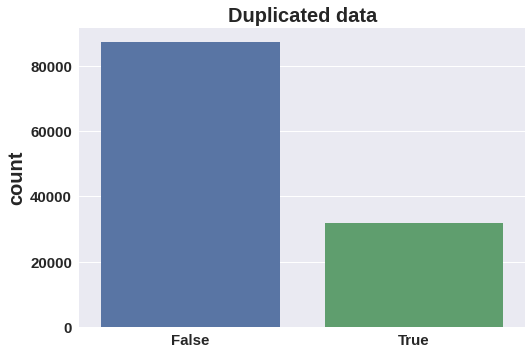

In [ ]:
# Showing duplicates count using seaborn count plot
sns.countplot(x=(hotel_bookings_df_copy.duplicated()))
plt.title("Duplicated data")

From above information we can see there are 31994 duplicated rows. So we will remove those duplicated rows for furthur smooth and clear analysis

In [ ]:
hotel_bookings_df_copy = hotel_bookings_df_copy.drop_duplicates()

In [ ]:
hotel_bookings_df_copy.shape

(87396, 32)

Now we will look into null values in every column

In [ ]:
hotel_bookings_df_copy.isna().sum().sort_values(ascending=False).reset_index().rename(columns={"index": "columns", 0: "null values"})

,columns,null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0
8,hotel,0
9,previous_cancellations,0


By looking at above result we can see (Company, agent, country and children columns are having null values) and among all these 4 columns company having lot more null values.
1. we will fill campany and agent columns with 0
2. we will fill country column by "Others". (Assume while collecting data user selected the the option "Other")
3. Fill children column with 0 by assuming no children

In [ ]:
# Here we are going to replace company, agent and children with same values so we can replace them together
null_columns = ["company","agent","children"]
for i in null_columns:
  hotel_bookings_df_copy[i].fillna(0, inplace=True)
hotel_bookings_df_copy["country"].fillna("Other", inplace=True)

In [ ]:
# Again check if null values are replaced or not
hotel_bookings_df_copy.isna().sum().reset_index().rename(columns={"index": "Column",0: "Null values"})

,Column,Null values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


In [ ]:
# Printing all dataframe where children, adults and babies are 0
hotel_bookings_df_copy.loc[(hotel_bookings_df_copy["adults"]==0) & (hotel_bookings_df_copy["children"]==0) & (hotel_bookings_df_copy["babies"]==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,...,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,...,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,...,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,...,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,...,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,...,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,...,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,...,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,...,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


By looking at above result we can say there is no booking were made.
So we will remove all the above rows.

In [ ]:
hotel_bookings_df_copy.drop(hotel_bookings_df_copy.loc[(hotel_bookings_df_copy["adults"]==0) & (hotel_bookings_df_copy["children"]==0) & (hotel_bookings_df_copy["babies"]==0)].index, inplace=True)

In [ ]:
# Again will chack the data where adults, children and babies are 0 to cofirms whether row have benn removed are not.
hotel_bookings_df_copy.loc[(hotel_bookings_df_copy["adults"]==0) & (hotel_bookings_df_copy["children"]==0) & (hotel_bookings_df_copy["babies"]==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
# Checking for unique values in every categorical data

# To check categorical columns first we need to seperate numaric and date relted columns
numaric_date_columns = list(hotel_bookings_df_copy._get_numeric_data().columns)+list(hotel_bookings_df_copy[['reservation_status_date','country','arrival_date_month']])

In [ ]:
categorical_columns = list(set(hotel_bookings_df_copy.columns)-set(numaric_date_columns))

In [ ]:
categorical_columns

['meal',
 'reservation_status',
 'deposit_type',
 'distribution_channel',
 'market_segment',
 'assigned_room_type',
 'customer_type',
 'reserved_room_type',
 'hotel']

In [ ]:
for col in categorical_columns:
  print(f"Unique values in column {col} are: {list(hotel_bookings_df_copy[col].unique())}")

Unique values in column meal are: ['BB', 'FB', 'HB', 'SC', 'Undefined']
Unique values in column reservation_status are: ['Check-Out', 'Canceled', 'No-Show']
Unique values in column deposit_type are: ['No Deposit', 'Refundable', 'Non Refund']
Unique values in column distribution_channel are: ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
Unique values in column market_segment are: ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']
Unique values in column assigned_room_type are: ['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K']
Unique values in column customer_type are: ['Transient', 'Contract', 'Transient-Party', 'Group']
Unique values in column reserved_room_type are: ['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B']
Unique values in column hotel are: ['Resort Hotel', 'City Hotel']


In [ ]:
# Now we will create some new columns by looking into existed columns
hotel_bookings_df_copy["total_members"] = hotel_bookings_df_copy["adults"]+hotel_bookings_df_copy["children"]+hotel_bookings_df_copy["babies"]
hotel_bookings_df_copy["total_stays"] = hotel_bookings_df_copy["stays_in_weekend_nights"]+hotel_bookings_df_copy["stays_in_week_nights"]

In [ ]:
hotel_bookings_df_copy[["total_members","total_stays"]].head()

,total_members,total_stays
0,2.0,0
1,2.0,0
2,1.0,1
3,1.0,1
4,2.0,2


# **As of now we had a basic understand about our data set.**
### **Now we will try to understand more our dataset by exploring, visualizing and subsetting the dataset**
**Now we will look into each and every variable one by one**

## **1. Hotel type which is most preferred by costumers**

In [ ]:
hotels_prefered = hotel_bookings_df_copy["hotel"].value_counts()
hotels_prefered

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Pie chart for most prefered hotel')

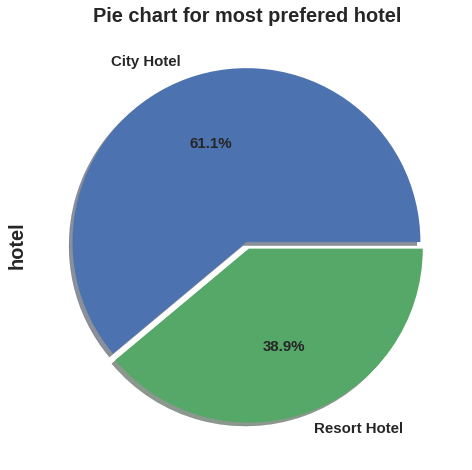

In [ ]:
# We will represent above data by visualizing
hotels_prefered.plot.pie(explode=[0.02, 0.02], autopct='%1.1f%%', shadow=True, fontsize=15, figsize=(10,8))
plt.title('Pie chart for most prefered hotel')

City hotels are most prefered hotels. Most of the guests are prefering city hotels

### **2. Which type of customers has more bookings**

In [ ]:
customer_types = hotel_bookings_df_copy["customer_type"].value_counts()
customer_types

Transient          71862
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64

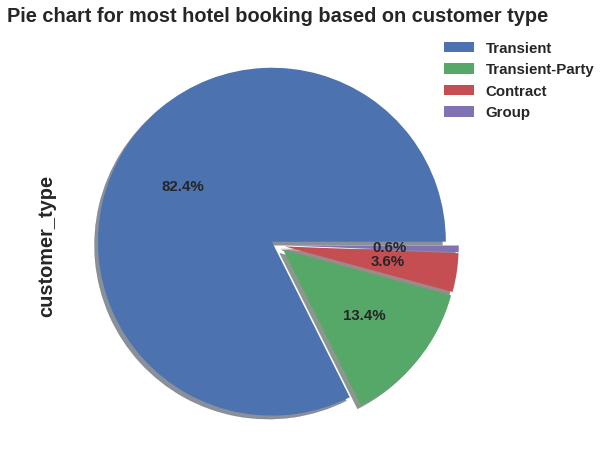

In [ ]:
# We will represent above data by visualizing
customer_types.plot.pie(explode=[0.04, 0.04, 0.04, 0.04], autopct='%1.1f%%', shadow=True, fontsize=15, figsize=(10,8), labels=None)
labels = hotel_bookings_df_copy["customer_type"].value_counts().index.tolist()
plt.title('Pie chart for most hotel booking based on customer type')
plt.legend(bbox_to_anchor=(0.85, 1), loc="upper left", labels=labels)

**1. Contract:** When the booking has allotment or other type of contract associated to it.

**2. Group:** When the booking is associated to group


**3. Transient:** When the booking is not a part of group or contract, and it is not associated with other transient booking

**Transient-party:** When booking is transient, and associated with at least one other transient booking

**Analysis:**

Transient customer type is more percentage of booking which is **82.4%** and Group type is low which is **0.6%**

## **3. Which type of rooms are most preferred rooms?**

In [ ]:
preferred_room_type = hotel_bookings_df_copy["reserved_room_type"].value_counts().reset_index().rename(columns={"index": "Room type", "reserved_room_type": "Count"})
preferred_room_type

,Room type,Count
0,A,56436
1,D,17376
2,E,6036
3,F,2820
4,G,2050
5,B,996
6,C,914
7,H,596
8,L,6


Text(0.5, 1.0, 'Most prefered rooms')

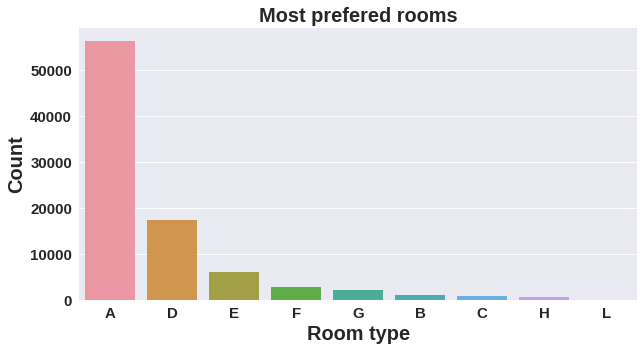

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=preferred_room_type["Room type"], y=preferred_room_type["Count"])
plt.title("Most prefered rooms")

**Analysis:**

Most of the guests are prefering the rooms "A"(Code of room type). So Code "A" type rooms can be increased in order to increase the bookings

## **4. Analysis of Cancellation**

**(i). Percentage of cancellations?**

In [ ]:
cancellation_perc = hotel_bookings_df_copy["is_canceled"].value_counts()
cancellation_perc

0    63221
1    24009
Name: is_canceled, dtype: int64

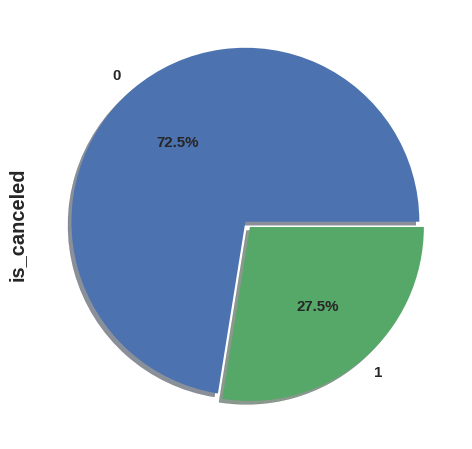

In [ ]:
cancellation_perc.plot.pie(explode=[0.02, 0.02], fontsize=15, autopct="%1.1f%%",shadow=True,figsize=(10,8))

**Analysis:**

0 = Not cancelled

1 = Cancelled

 And we can see in above result that 27.5% bookings has been cancelled

**(ii). Distribution channel wise cancellation?**

In [ ]:
distribution_channel = hotel_bookings_df_copy.groupby("distribution_channel").agg("sum")["is_canceled"].reset_index()
distribution_channel["is_canceled%"] = round((distribution_channel["is_canceled"]/distribution_channel["is_canceled"].sum())*100,2)
# dc_wise_cancellation = pd.DataFrame((distribution_channel["is_canceled"].sum()/distribution_channel.size())*100).rename(columns = {0: "cancel %"})
# dc_wise_cancellation
distribution_channel

,distribution_channel,is_canceled,is_canceled%
0,Corporate,646,2.69
1,Direct,1923,8.01
2,GDS,36,0.15
3,TA/TO,21400,89.13
4,Undefined,4,0.02


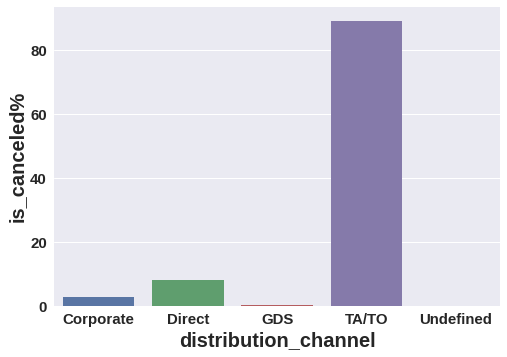

In [ ]:
sns.barplot(x = distribution_channel["distribution_channel"], y = distribution_channel["is_canceled%"])

**Analysis:**

By looking at above graph we can see distribution channel "TA/TO"  has more cancellations with 89.13%

**(iii). Reasons for cancellation of bookings?**

In [ ]:
# Lets assume longer waiting period is causing the cancellation. Se lets check whether is True or False
waiting_period = hotel_bookings_df_copy[hotel_bookings_df_copy["days_in_waiting_list"] != 0]
waiting_period.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_stays
2272,Resort Hotel,0,59,2015,October,41,8,0,3,2,0.0,0,BB,PRT,Corporate,...,A,A,0,No Deposit,281.0,0.0,50,Contract,45.0,0,0,Check-Out,2015-10-11,2.0,3
2486,Resort Hotel,0,47,2015,October,43,19,1,4,2,0.0,0,HB,ESP,Groups,...,A,A,0,No Deposit,0.0,0.0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,2.0,5
2508,Resort Hotel,0,47,2015,October,43,19,1,4,2,0.0,0,HB,PRT,Groups,...,A,A,0,No Deposit,0.0,0.0,47,Transient-Party,76.8,0,0,Check-Out,2015-10-24,2.0,5
3106,Resort Hotel,0,105,2015,November,47,18,2,4,2,0.0,0,Undefined,ESP,Offline TA/TO,...,A,A,0,No Deposit,313.0,0.0,65,Transient-Party,69.0,0,0,Check-Out,2015-11-24,2.0,6
3118,Resort Hotel,0,105,2015,November,47,18,2,4,2,0.0,0,Undefined,PRT,Offline TA/TO,...,A,A,1,No Deposit,313.0,0.0,65,Transient-Party,71.0,0,0,Check-Out,2015-11-24,2.0,6


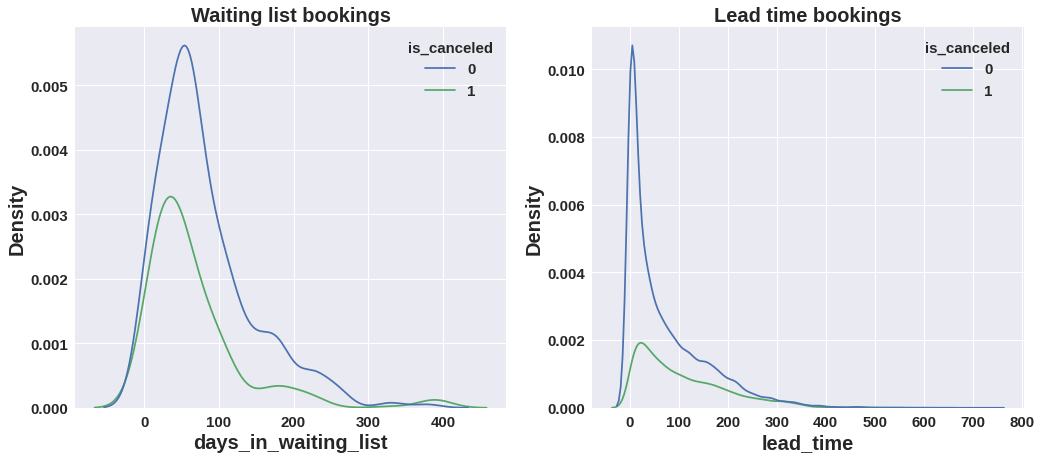

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(17,7))
# plot waiting list bookings cancelletions
sns.kdeplot(ax=axes[0], x = "days_in_waiting_list", hue = "is_canceled", data = waiting_period)
# Plot lead time booking cancellations
sns.kdeplot(ax=axes[1], x = hotel_bookings_df_copy["lead_time"], hue = hotel_bookings_df_copy["is_canceled"])
axes[0].title.set_text("Waiting list bookings")
axes[1].title.set_text("Lead time bookings")
plt.show()

**Analysis:**

1. By looking at waiting list plot we can see less than 150 days waiting list has canceled and also there is not canceled bookings also more in less than 150 days waiting list. Hence we can say days in waiting list is not much affecting the cancelation.

2. By looking atlead time plot we can obsorve both the lines are similar with respect to the days in waiting list. Hence lead time also not much affecting the cancelation of bookings 

**(iv). Check if not getting same room is affecting the average daily revenue?**

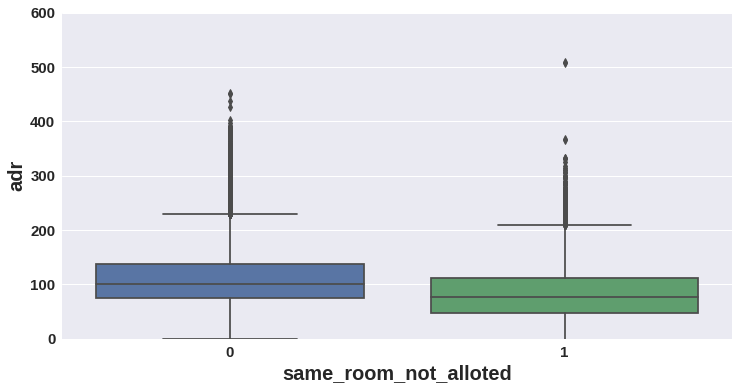

In [ ]:
# Create new column with name "same_room_not_alloted"
def room_allotement(column):
  if column["reserved_room_type"] != column["assigned_room_type"]:
    return 1
  else:
    return 0
plt.figure(figsize=(12,6))
hotel_bookings_df_copy["same_room_not_alloted"] = hotel_bookings_df_copy.apply(lambda x: room_allotement(x), axis=1)
sns.boxplot(x = "same_room_not_alloted", y = "adr", data = hotel_bookings_df_copy)
plt.ylim(0,600)
plt.show()

**Analysis:**

0: is same room allotted

1: is Same room is not allotted

We can see in the plot same room allotted and not allotted are almost similar. Hence, Not getting same room is affecting the daily "adr". Guests who are not getting the same room are paying the less adr compared to same room alloted.

# **5. Which agent made more bookings**

In [ ]:
most_booked_agent = hotel_bookings_df_copy.groupby("agent")["agent"].agg({"count"}).reset_index().rename(columns={"count": "Bookings"}).sort_values(by="Bookings", ascending=False)
most_booked_agent.drop(most_booked_agent.loc[(most_booked_agent["Bookings"]==0)].index, inplace=True)
top_ten_agents = most_booked_agent[:10]
top_ten_agents

,agent,Bookings
9,9.0,28721
174,240.0,13028
0,0.0,12141
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228


Text(0.5, 1.0, 'Most bookings made by agent')

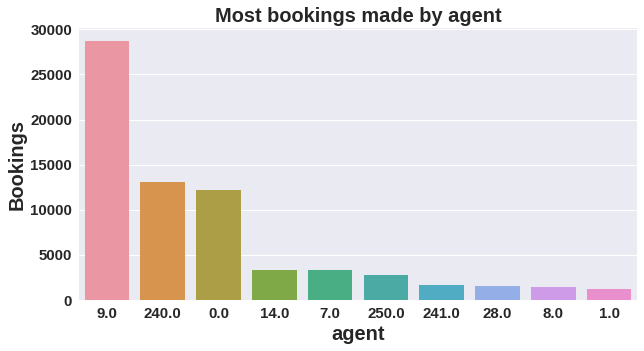

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ten_agents["agent"], y=top_ten_agents["Bookings"], order=top_ten_agents["agent"])
plt.title("Most bookings made by agent")

By looking at above result we can see agent with ID Number: 9 has done more bookings

# **6. Percentage of repeated guests?**

In [ ]:
repeated_guests = hotel_bookings_df_copy["is_repeated_guest"].value_counts()
repeated_guests

0    83866
1     3364
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Repeated guests')

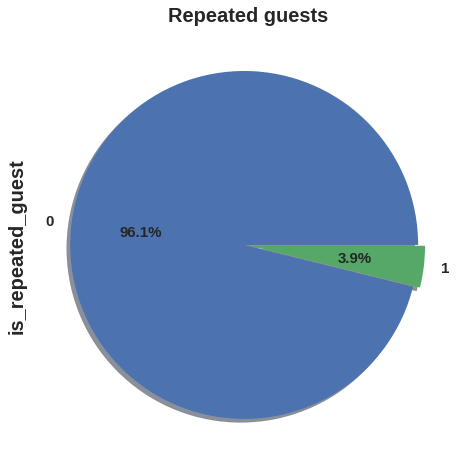

In [ ]:
repeated_guests.plot.pie(explode=[0.02,0.02], autopct='%1.1f%%', fontsize=15, figsize=(10,8), shadow=True)
plt.title("Repeated guests")

**Analysis:**

0 = Not repeated

1 = Repeated

There is only few guest are repeated which is 3.9%.

## **7. Percentage distribution of required_car_parking_spaces?**

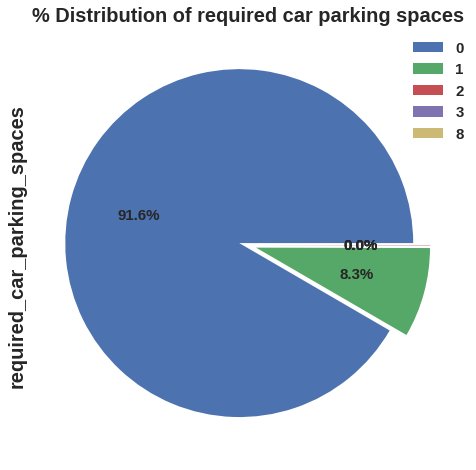

In [ ]:
hotel_bookings_df_copy['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)
labels = hotel_bookings_df_copy["required_car_parking_spaces"].value_counts().index
plt.title("% Distribution of required car parking spaces")
plt.legend(bbox_to_anchor=(0.85, 1), loc="upper left", labels=labels)

**Observation**

91.6% guests did not required the parking space where only 8.3% of guests required inly 1 parking space

## **8. What is the percentage of booking changes made by the customer.?**

Text(0, 0.5, 'Percentage(%)')

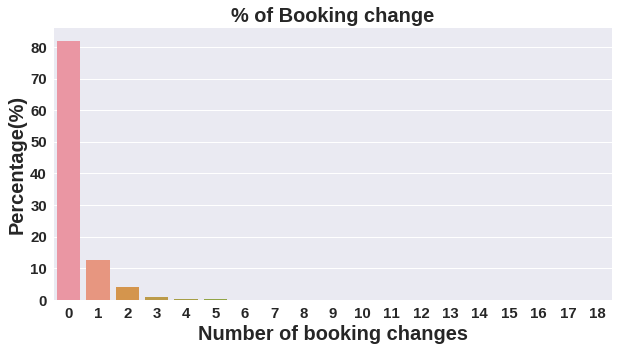

In [ ]:
booking_changes_df=hotel_bookings_df_copy['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(10,5))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/hotel_bookings_df_copy.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

**Observation:**

Most of the guests are preferring the rooms "A"(Code of room type). So, Code "A" type rooms can be increased to increase the bookings

# **9. Analysis of Distribution channel**

**(i). Distribution channel which is made more bookings?**

In [ ]:
distribution_channel = hotel_bookings_df_copy.groupby("distribution_channel")
distribution_channel_pct = pd.DataFrame(round((distribution_channel.size()/hotel_bookings_df_copy.shape[0])*100,2)).reset_index().rename(columns = {0: "Bookings %"})
distribution_channel_pct

,distribution_channel,Bookings %
0,Corporate,5.80
1,Direct,14.85
2,GDS,0.21
3,TA/TO,79.13
4,Undefined,0.01


Text(0.5, 1.0, 'Booking distribution % by distribution channels')

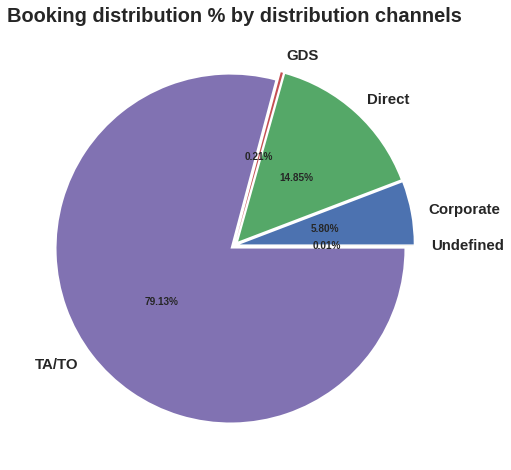

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x = distribution_channel_pct["Bookings %"], explode=[0.03]*5, shadow=False, labels=distribution_channel_pct["distribution_channel"], autopct="%.2f%%", pctdistance=0.5)
plt.title("Booking distribution % by distribution channels")

**Analysis:**

By looking at above graph we can see distribution channel "TA/TO" has done more bookings

**(ii). Distribution channel which is used for early bookings?**

Text(0.5, 1.0, 'Distribution channel which is used for early bookings')

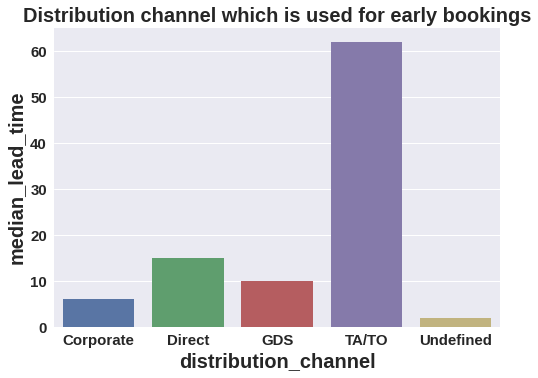

In [ ]:
early_bookings_dc = pd.DataFrame(round(distribution_channel["lead_time"].median(),2)).reset_index().rename(columns = {"lead_time": "median_lead_time"})
x = early_bookings_dc["distribution_channel"]
y = early_bookings_dc["median_lead_time"]
sns.barplot(x = x, y = y )
plt.title("Distribution channel which is used for early bookings")

**Analysis:**

By looking at above graph we can see Distribution channel "TA/TO" used for early bookings

**(iii). Distribution channel making good revenue generating with respect to hotel?**

In [ ]:
# Find the "adr" of each distribtion channel with respect to the hotel
distribution_channels_revenue = hotel_bookings_df_copy.groupby(["distribution_channel", "hotel"])["adr"].agg(np.mean).reset_index().rename(columns = {"adr": "average_adr"})
distribution_channels_revenue

,distribution_channel,hotel,average_adr
0,Corporate,City Hotel,83.777368
1,Corporate,Resort Hotel,53.036835
2,Direct,City Hotel,112.606688
3,Direct,Resort Hotel,106.566215
4,GDS,City Hotel,120.317845
5,TA/TO,City Hotel,112.663552
6,TA/TO,Resort Hotel,101.578317
7,Undefined,City Hotel,29.625000
8,Undefined,Resort Hotel,112.700000


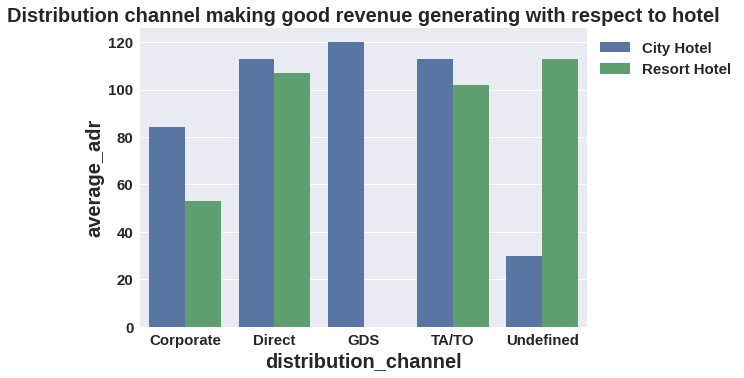

In [ ]:
sns.barplot(x = distribution_channels_revenue["distribution_channel"], y = round(distribution_channels_revenue["average_adr"]), hue=distribution_channels_revenue["hotel"])
plt.title("Distribution channel making good revenue generating with respect to hotel")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

**Observation:**

Distribution channels 'Direct' and 'TA/TO' are contributing the most in both types of hotels. GDS distribution channel should focus on increasing the bookings of 'City Hotel'.​

## **10. adr analysis**

**(i) adr across the market segments**

In [ ]:
market_segments_adr = hotel_bookings_df_copy.groupby(["market_segment", "hotel", "is_canceled"])["adr"].mean().reset_index()
market_segments_adr

,market_segment,hotel,is_canceled,adr
0,Aviation,City Hotel,0,100.630829
1,Aviation,City Hotel,1,100.544444
2,Complementary,City Hotel,0,2.875501
3,Complementary,City Hotel,1,2.191296
4,Complementary,Resort Hotel,0,4.390127
5,Complementary,Resort Hotel,1,1.209677
6,Corporate,City Hotel,0,82.079575
7,Corporate,City Hotel,1,90.012586
8,Corporate,Resort Hotel,0,49.569977
9,Corporate,Resort Hotel,1,68.510935


Text(0.5, 1.0, 'Adr across market segments')

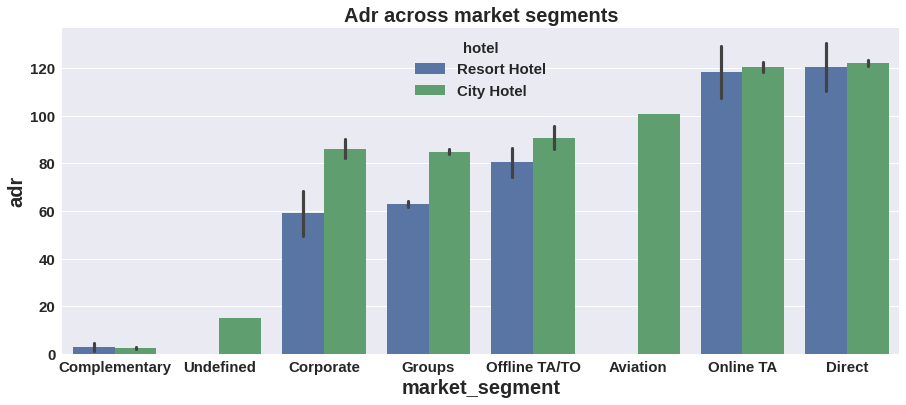

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = "market_segment", y = "adr", hue="hotel", data=market_segments_adr.sort_values(by="adr"))
plt.title("Adr across market segments")

**Analysis:**

Market segment "Direct" has the high adr in both Resort and City hotels where "Complementary" has less.
Aviation segment can focus on City hotel.

## **11. Time siries analysis**

**(i). Month wise bookings**

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
arrival_month_df = hotel_bookings_df_copy["arrival_date_month"].value_counts().reset_index().rename(columns = {"index": "month", "arrival_date_month": "number_of_guests"})
arrival_month_df["month"] = pd.Categorical(arrival_month_df["month"], categories=months, ordered=True)
arrival_month_df = arrival_month_df.sort_values(by="month").reset_index()
arrival_month_df.drop("index", axis=1, inplace=True)
arrival_month_df

,month,number_of_guests
0,January,4685
1,February,6083
2,March,7489
3,April,7900
4,May,8344
5,June,7756
6,July,10043
7,August,11242
8,September,6682
9,October,6921


Text(0.5, 1.0, 'Month wise bookings')

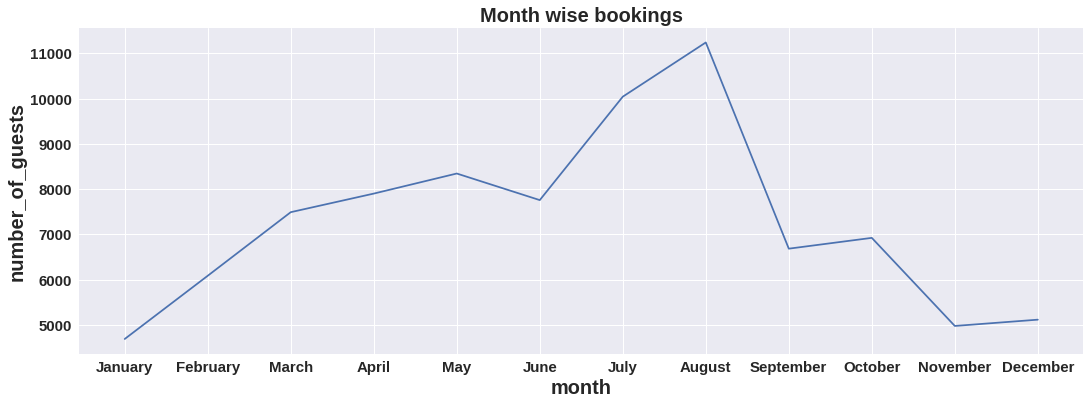

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x="month", y = "number_of_guests", data=arrival_month_df)
plt.title("Month wise bookings")

**Analysis:**

Bookings has been increasing till the mid of year and we can see in August bookings went to highest. Hense, Most of the people are planning trips in august month

**(ii). adr across the months**

Text(0.5, 1.0, 'adr across the month')

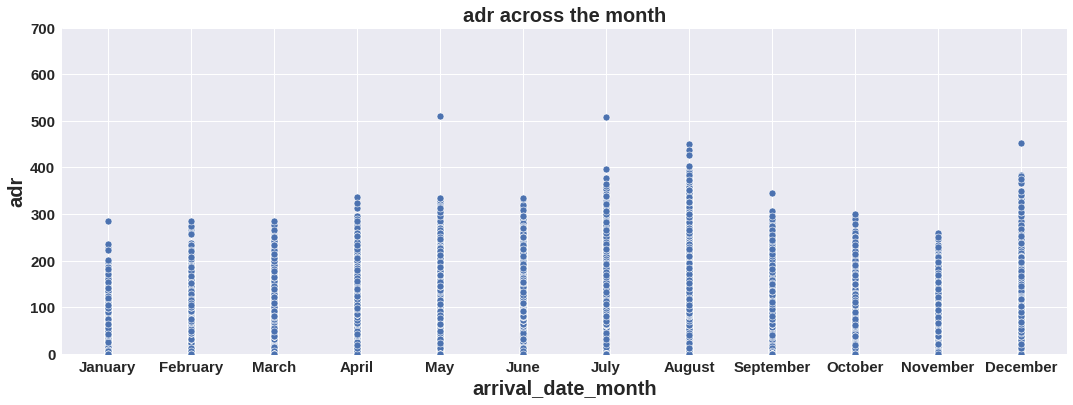

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
hotel_bookings_df_copy["arrival_date_month"] = pd.Categorical(hotel_bookings_df_copy["arrival_date_month"], categories=months, ordered=True)
plt.figure(figsize=(18,6))
sns.scatterplot(x = hotel_bookings_df_copy["arrival_date_month"], y = hotel_bookings_df_copy["adr"])
plt.ylim(0,700)
plt.title("adr across the month")
# arrival_month_df

**Analysis:**

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also

In [ ]:
not_canceled = hotel_bookings_df_copy[hotel_bookings_df_copy['is_canceled'] == 0]
singles = not_canceled[(not_canceled["adults"]==1) & (not_canceled["children"]==0) & (not_canceled["babies"]==0)]
couple = not_canceled[(not_canceled["adults"]==2) & (not_canceled["children"]==0) & (not_canceled["babies"]==0)]
family = not_canceled[not_canceled["adults"]+not_canceled["children"]+not_canceled["babies"]>2]

In [ ]:
singles.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_stays,same_room_not_alloted
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,...,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,...,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0,1,0
20,Resort Hotel,0,37,2015,July,27,1,1,4,1,0.0,0,BB,GBR,Online TA,...,F,0,No Deposit,241.0,0.0,0,Transient,97.29,0,1,Check-Out,2015-07-06,1.0,5,0
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,Other,Direct,...,A,2,No Deposit,0.0,0.0,0,Transient,62.00,0,2,Check-Out,2015-07-15,1.0,14,0
77,Resort Hotel,0,2,2015,July,27,3,2,2,1,0.0,0,BB,PRT,Online TA,...,A,0,No Deposit,240.0,0.0,0,Transient,122.00,0,0,Check-Out,2015-07-07,1.0,4,0


In [ ]:
couple.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_stays,same_room_not_alloted
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,...,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,...,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,...,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,...,C,0,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2.0,2,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,...,C,0,No Deposit,303.0,0.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2.0,2,0


In [ ]:
family.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_stays,same_room_not_alloted
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,...,G,1,No Deposit,241.0,0.0,0,Transient,154.77,0,1,Check-Out,2015-07-05,3.0,4,0
37,Resort Hotel,0,36,2015,July,27,2,1,3,3,0.0,0,BB,PRT,Online TA,...,D,0,No Deposit,241.0,0.0,0,Transient,108.80,0,1,Check-Out,2015-07-06,3.0,4,0
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,2.0,0,BB,ESP,Direct,...,C,0,No Deposit,0.0,0.0,0,Transient,107.00,1,2,Check-Out,2015-07-03,4.0,1,0
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,2.0,0,BB,USA,Online TA,...,H,0,No Deposit,240.0,0.0,0,Transient,153.00,1,0,Check-Out,2015-07-05,4.0,2,1
79,Resort Hotel,0,81,2015,July,27,3,2,6,3,0.0,0,BB,PRT,Offline TA/TO,...,D,0,No Deposit,5.0,0.0,0,Transient,85.86,0,0,Check-Out,2015-07-11,3.0,8,0


Text(0.5, 1.0, 'Bookings done by guests category wise')

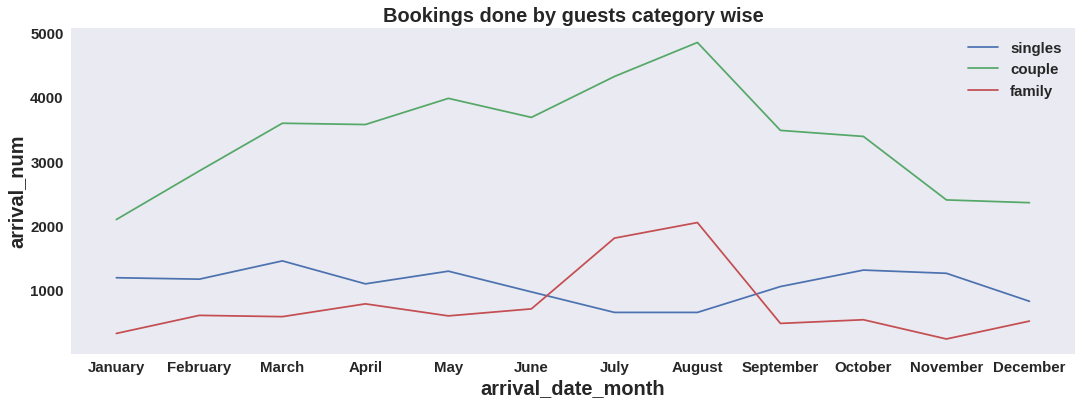

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fig, axes = plt.subplots(figsize=(18,6))
for i in ["singles","couple","family"]:
  df = eval(i).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=months, ordered=True)
  sns.lineplot(x="arrival_date_month", y = "arrival_num", label=i, ax=axes, data=df)
plt.grid()
plt.title("Bookings done by guests category wise")

**Observation:**

Mostly bookings are done by couples(although we are not sure that they are couple as data doesn't talk about that)​

It is clear from graph that there is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.